In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.io import loadmat
from scipy import stats
import statsmodels.api as sm
plt.style.use("ggplot")        # pick any style you like
%matplotlib inline

In [ ]:
mat = loadmat(r"C:\Users\PORTATIL\MATLAB Drive\TFM\AllB_JF.mat") #file

def to_df(arr, prefix):
    """Make a DataFrame (rows=time) with generic column labels."""
    arr = np.asarray(arr)
    n_cols = arr.shape[1] if arr.ndim > 1 else 1
    cols   = [f"{prefix}{i+1}" for i in range(n_cols)]
    return pd.DataFrame(arr, columns=cols)

Y   = to_df(mat["Y"],   "Fund_")      # fund excess returns
TNA = to_df(mat["TNA"], "TNA_")       # lagged size
F   = to_df(mat["F"],   "F")          # factors (F1 is the constant)
rf  = to_df(mat["rf"],  "rf")         # risk-free rate (single col)

# Combine a few for convenience (align on index)
panel = pd.concat([Y, TNA, F, rf], axis=1)
panel.head()


,Fund_1,Fund_2,Fund_3,Fund_4,Fund_5,Fund_6,Fund_7,Fund_8,Fund_9,Fund_10,...,TNA_2318,TNA_2319,TNA_2320,TNA_2321,F1,F2,F3,F4,F5,rf1
0,-999.0,-999.0,-999.0,-999.0,-999.0,0.005069,-999.0,-999.0,-999.0,0.158994,...,-999.0,-999.0,-999.0,-999.0,1.0,0.117810,0.1280,0.0822,-0.1386,0.0058
1,-999.0,-999.0,-999.0,-999.0,-999.0,0.002013,-999.0,-999.0,-999.0,0.043437,...,-999.0,-999.0,-999.0,-999.0,1.0,0.063160,-0.0066,-0.0450,-0.0058,0.0043
2,-999.0,-999.0,-999.0,-999.0,-999.0,-0.005073,-999.0,-999.0,-999.0,0.010927,...,-999.0,-999.0,-999.0,-999.0,1.0,0.019914,0.0400,0.0241,-0.0199,0.0041
3,-999.0,-999.0,-999.0,-999.0,-999.0,0.010165,-999.0,-999.0,-999.0,0.048636,...,-999.0,-999.0,-999.0,-999.0,1.0,0.045024,-0.0058,-0.0111,0.0133,0.0044
4,-999.0,-999.0,-999.0,-999.0,-999.0,0.037327,-999.0,-999.0,-999.0,0.095371,...,-999.0,-999.0,-999.0,-999.0,1.0,0.046793,0.0290,-0.0408,-0.0047,0.0044


In [7]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'F', 'rf', 'Y', 'TNA', 'TNA1', 'n', 'I', 'Xbrut', 'Z', 'TNAS', 'TNA1S', 's', 'nchi', 'fundids', 'Tchi', 'T', 'stylemat'])


In [10]:
Y

,Fund_1,Fund_2,Fund_3,Fund_4,Fund_5,Fund_6,Fund_7,Fund_8,Fund_9,Fund_10,...,Fund_2312,Fund_2313,Fund_2314,Fund_2315,Fund_2316,Fund_2317,Fund_2318,Fund_2319,Fund_2320,Fund_2321
0,-999.000000,-999.000000,-999.000000,-999.0,-999.0,0.005069,-999.0,-999.0,-999.0,0.158994,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
1,-999.000000,-999.000000,-999.000000,-999.0,-999.0,0.002013,-999.0,-999.0,-999.0,0.043437,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
2,-999.000000,-999.000000,-999.000000,-999.0,-999.0,-0.005073,-999.0,-999.0,-999.0,0.010927,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
3,-999.000000,-999.000000,-999.000000,-999.0,-999.0,0.010165,-999.0,-999.0,-999.0,0.048636,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
4,-999.000000,-999.000000,-999.000000,-999.0,-999.0,0.037327,-999.0,-999.0,-999.0,0.095371,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.025529,-0.044610,0.000671,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-0.032995,...,-0.025650,-0.066999,-0.020712,-0.018731,-0.024692,-0.044218,-0.031497,-0.040044,-0.002624,-0.045640
536,0.018445,0.034952,-0.002850,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-0.021228,...,0.026886,0.049031,0.024658,-0.002298,0.026375,0.022207,0.029555,0.038460,0.030620,-0.006800
537,0.026697,0.006352,0.017906,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,0.012098,...,-999.000000,0.015792,0.018038,0.017692,0.021695,0.042150,0.009011,0.023518,0.016188,0.026759
538,0.029942,0.032738,0.045252,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,0.063797,...,-999.000000,0.045638,0.031616,0.053060,0.036336,0.045448,0.022846,0.044569,0.027067,0.040592


In [3]:

mat = loadmat(r"C:\Users\PORTATIL\MATLAB Drive\TFM\AllB_JF.mat")

# Core matrices
Y     = np.asarray(mat["Y"])       # 540 x 2321
TNA   = np.asarray(mat["TNA"])     # same shape
F     = np.asarray(mat["F"])       # 540 x 5
rf    = np.asarray(mat["rf"]).flatten()  # 540 x 1 → flatten to 1D
style = np.asarray(mat["stylemat"])      # 2321 x 18
fundids = mat["fundids"].flatten()       # 2321 × 1 → fund ID for each column

T, N = Y.shape

In [4]:
# Time and Fund grids
time_idx = np.arange(T)
fund_idx = np.arange(N)

time_grid, fund_grid = np.meshgrid(time_idx, fund_idx, indexing='ij')
df = pd.DataFrame({
    "time": time_grid.ravel(),
    "fund_index": fund_grid.ravel(),
    "fund_id": fundids[fund_grid.ravel()],
    "Y": Y.ravel(),
    "TNA": TNA.ravel(),
    # add more fields if needed (e.g., TNA1, etc.)
})


In [5]:
style_df = pd.DataFrame(style, columns=[f"style_{i+1}" for i in range(style.shape[1])])
style_df["fund_id"] = fundids

# Merge into long panel
df = df.merge(style_df, on="fund_id", how="left")


In [12]:
df.replace(-999, np.nan, inplace=True)
df.head()

,time,fund_index,fund_id,Y,TNA,style_1,style_2,style_3,style_4,style_5,...,style_9,style_10,style_11,style_12,style_13,style_14,style_15,style_16,style_17,style_18
0,0,0,100001,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,100003,NaN,NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2,100004,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,100006,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,100009,NaN,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:

df_clean = df.dropna(subset=["Y", "TNA"])
df_clean.shape

(542618, 29)

In [40]:
df_clean.head()

,time,fund_index,fund_id,Y,TNA,style_1,style_2,style_3,style_4,style_5,...,style_15,style_16,style_17,style_18,logTNA_bin,F1,F2,F3,F4,F5
5,0,5,100010,0.005069,64.361911,0,0,0,0,0,...,0,0,0,0,"(3.834, 4.462]",1.0,0.11781,0.128,0.0822,-0.1386
9,0,9,100019,0.158994,35.243098,0,0,0,1,0,...,0,0,0,0,"(3.206, 3.834]",1.0,0.11781,0.128,0.0822,-0.1386
15,0,15,100046,0.091393,57.922143,0,0,0,0,0,...,0,0,0,0,"(3.834, 4.462]",1.0,0.11781,0.128,0.0822,-0.1386
16,0,16,100047,0.135792,58.868593,0,0,0,0,0,...,0,0,0,0,"(3.834, 4.462]",1.0,0.11781,0.128,0.0822,-0.1386
18,0,18,100055,0.141008,3610.879183,0,0,0,0,0,...,0,0,0,0,"(7.604, 8.233]",1.0,0.11781,0.128,0.0822,-0.1386


dirty degression

Text(0.5, 1.0, 'Average Return vs Average Fund Size over Time')

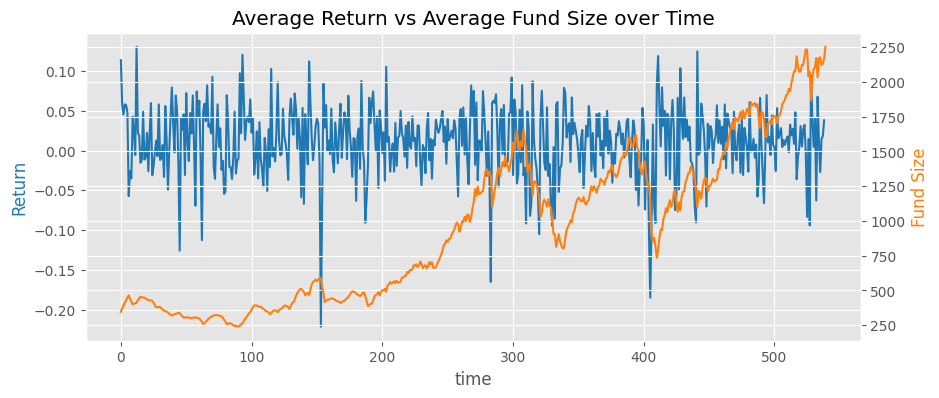

In [44]:
avg_ret = df.groupby("time")["Y"].mean()
avg_size = df.groupby("time")["TNA"].mean()

fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()

avg_ret.plot(ax=ax1, color="tab:blue", label="Avg Excess Return")
avg_size.plot(ax=ax2, color="tab:orange", label="Avg Fund Size (TNA)")

ax1.set_ylabel("Return", color="tab:blue")
ax2.set_ylabel("Fund Size", color="tab:orange")
ax1.set_title("Average Return vs Average Fund Size over Time")

In [15]:
X = sm.add_constant(np.log(df_clean["TNA"]))
y = df_clean["Y"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     534.7
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          3.02e-118
Time:                        23:29:42   Log-Likelihood:             8.4895e+05
No. Observations:              542618   AIC:                        -1.698e+06
Df Residuals:                  542616   BIC:                        -1.698e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0143      0.000     64.598      0.0

Text(0.5, 1.0, 'Fund Size vs Return (Full Sample)')

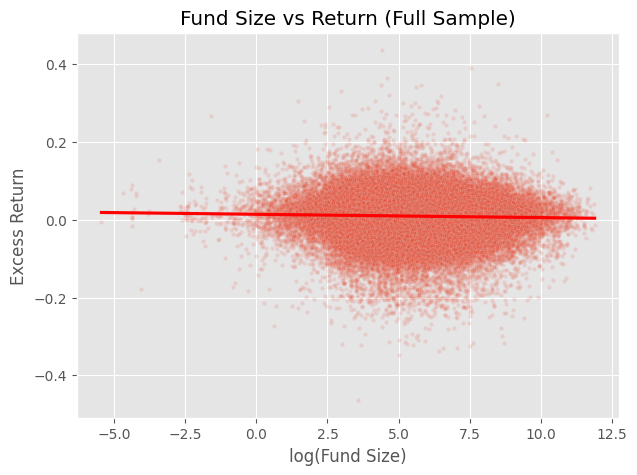

In [20]:

# Subsample to reduce overplotting (optional)
sample = df_clean.sample(100_000, random_state=1).dropna(subset=["Y", "TNA"])

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample, x=np.log(sample["TNA"]), y=sample["Y"], alpha=0.15, s=10)
sns.regplot(data=sample, x=np.log(sample["TNA"]), y=sample["Y"], scatter=False, color="red")
plt.xlabel("log(Fund Size)")
plt.ylabel("Excess Return")
plt.title("Fund Size vs Return (Full Sample)")

Text(0.5, 1.0, 'Fund Size vs Return (Full Sample)')

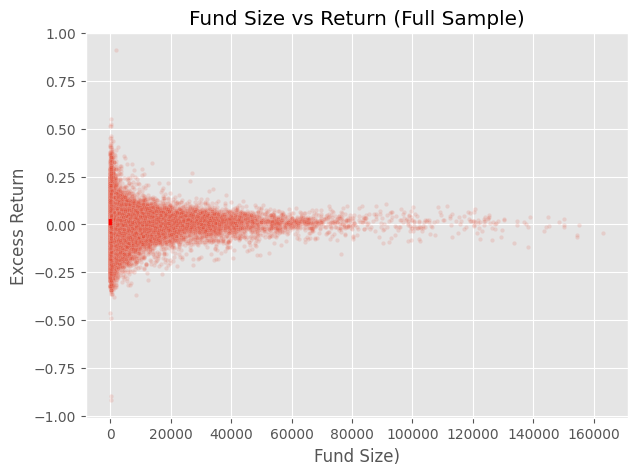

In [19]:

# Subsample to reduce overplotting (optional)
sample = df_clean.sample(500_000, random_state=1).dropna(subset=["Y", "TNA"])

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample, x=sample["TNA"], y=sample["Y"], alpha=0.15, s=10)
sns.regplot(data=sample, x=np.log(sample["TNA"]), y=sample["Y"], scatter=False, color="red")
plt.xlabel("Fund Size)")
plt.ylabel("Excess Return")
plt.title("Fund Size vs Return (Full Sample)")

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_17196\738847760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["size_q"] = df_clean.groupby("time")["TNA"].transform(lambda x: pd.qcut(np.log(x), 5, labels=False, duplicates='drop'))


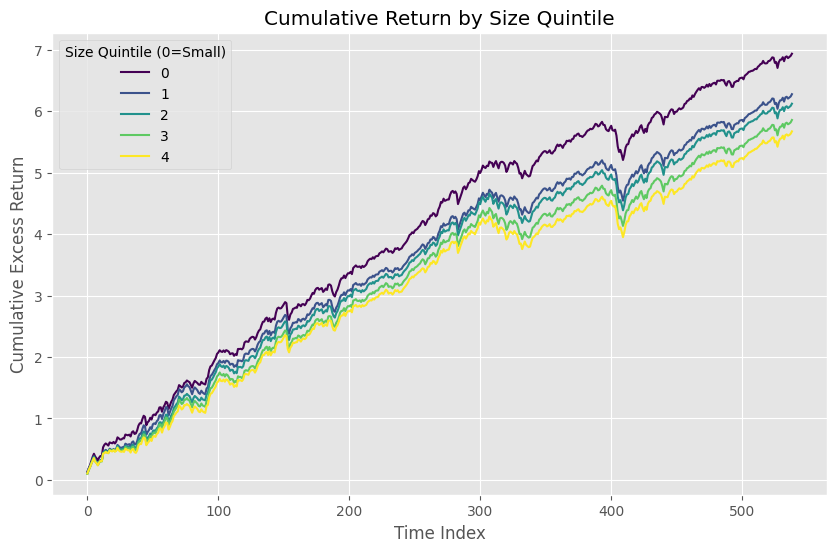

In [21]:
# Create size quintiles at each time
df_clean["size_q"] = df_clean.groupby("time")["TNA"].transform(lambda x: pd.qcut(np.log(x), 5, labels=False, duplicates='drop'))
quintile_means = df_clean.groupby(["time", "size_q"])["Y"].mean().unstack()

# Plot time series
quintile_means.cumsum().plot(figsize=(10,6), cmap="viridis")
plt.title("Cumulative Return by Size Quintile")
plt.ylabel("Cumulative Excess Return")
plt.xlabel("Time Index")
plt.legend(title="Size Quintile (0=Small)")


Controlling for factors F

In [24]:
F_df = pd.DataFrame(F, columns=[f"F{i+1}" for i in range(F.shape[1])])
F_df["time"] = np.arange(F.shape[0])

# Merge into df
df = df.merge(F_df, on="time", how="left")

In [26]:
df.head()

,time,fund_index,fund_id,Y,TNA,style_1,style_2,style_3,style_4,style_5,...,style_15,style_16,style_17,style_18,logTNA_bin,F1,F2,F3,F4,F5
0,0,0,100001,NaN,NaN,0,0,0,0,0,...,0,0,0,0,NaN,1.0,0.11781,0.128,0.0822,-0.1386
1,0,1,100003,NaN,NaN,0,0,0,0,0,...,0,0,0,0,NaN,1.0,0.11781,0.128,0.0822,-0.1386
2,0,2,100004,NaN,NaN,0,0,0,0,0,...,0,0,0,0,NaN,1.0,0.11781,0.128,0.0822,-0.1386
3,0,3,100006,NaN,NaN,0,0,0,0,0,...,0,0,0,0,NaN,1.0,0.11781,0.128,0.0822,-0.1386
4,0,4,100009,NaN,NaN,0,0,1,0,0,...,0,0,0,0,NaN,1.0,0.11781,0.128,0.0822,-0.1386


In [27]:
# Prepare clean data
df_clean = df.dropna(subset=["Y", "TNA", "F2", "F3", "F4", "F5"])
X = df_clean[["TNA", "F2", "F3", "F4", "F5"]].copy()
X["logTNA"] = np.log(X["TNA"])

# Drop raw TNA
X = X.drop(columns="TNA")

# Add constant
X = sm.add_constant(X)

# Regress
model = sm.OLS(df_clean["Y"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 3.305e+05
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:43:41   Log-Likelihood:             1.2278e+06
No. Observations:              542618   AIC:                        -2.456e+06
Df Residuals:                  542612   BIC:                        -2.456e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.000     60.329      0.0

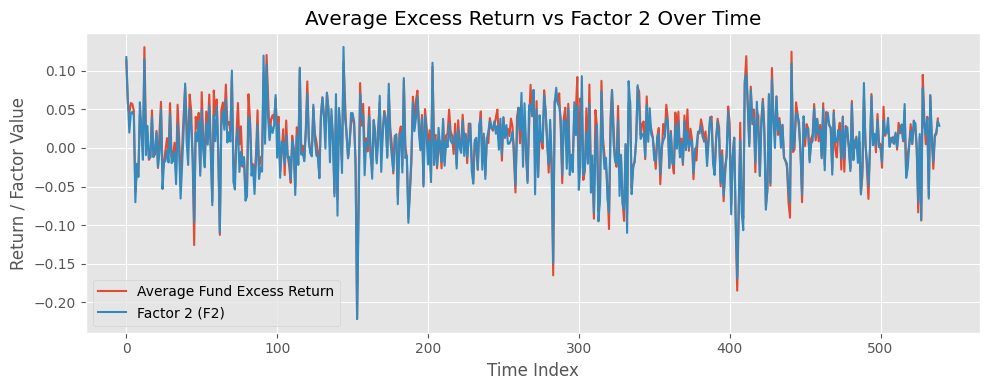

In [46]:
# 1. Aggregate: mean fund return per time and single F2 per time
avg_ret = df.groupby('time')['Y'].mean()
factor2 = df.groupby('time')['F2'].first()

# 2. Plot
plt.figure(figsize=(10,4))
plt.plot(avg_ret.index, avg_ret.values, label='Average Fund Excess Return')
plt.plot(factor2.index, factor2.values, label='Factor 2 (F2)')
plt.xlabel('Time Index')
plt.ylabel('Return / Factor Value')
plt.title('Average Excess Return vs Factor 2 Over Time')
plt.legend()
plt.tight_layout()

Analysis by size quintiles

In [41]:
# Compute average TNA for each fund
avg_tna = df_clean.groupby("fund_id")["TNA"].mean()
tna_q = pd.qcut(np.log(avg_tna), 15, labels=False)

# Assign each fund to its quintile
fund_quintile = pd.DataFrame({"fund_id": avg_tna.index, "size_quintile": tna_q})
df_clean = df_clean.merge(fund_quintile.set_index("fund_id"), left_index=True, right_index=True, how="left")


In [42]:

results = []

for q in range(15):
    sub = df_clean[df_clean["size_quintile"] == q].dropna(subset=["Y", "TNA", "F2", "F3", "F4", "F5"])
    
    X = sub[["F2", "F3", "F4", "F5"]].copy()
    X["logTNA"] = np.log(sub["TNA"])
    X = sm.add_constant(X)
    y = sub["Y"]
    
    model = sm.OLS(y, X).fit()
    
    results.append({
        "quintile": q,
        "logTNA coef": model.params["logTNA"],
        "logTNA t-stat": model.tvalues["logTNA"],
        "alpha": model.params["const"],
        "R²": model.rsquared
    })

# Create summary DataFrame
import pandas as pd
summary_df = pd.DataFrame(results)
summary_df["quintile"] = summary_df["quintile"] + 1  # 1-indexed
summary_df

,quintile,logTNA coef,logTNA t-stat,alpha,R²
0,1,-0.001945,-1.127691,0.009694,0.630095
1,2,0.005409,1.887681,-0.015142,0.934235
2,3,0.000950,0.395143,0.015542,0.678700
3,4,-0.000985,-0.265881,0.003380,0.759825
4,5,0.002088,0.972813,-0.000146,0.832546
5,6,0.001408,0.445428,0.007236,0.878489
6,7,-0.000904,-0.253479,0.006198,0.628109
7,8,0.003217,0.878432,0.000177,0.739106
8,9,-0.003687,-0.889043,0.035883,0.673102
9,10,0.004038,0.982222,-0.038846,0.836101


Text(0, 0.5, 'log(TNA) Coefficient')

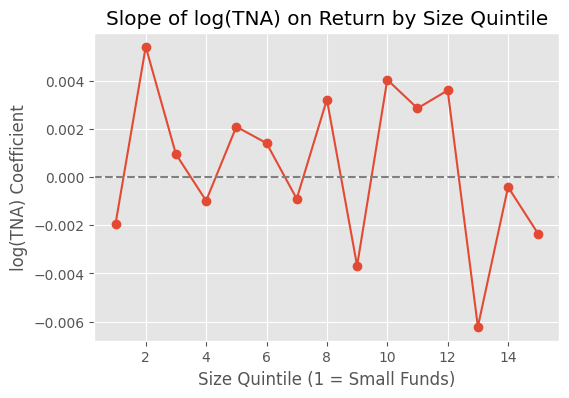

In [ ]:

plt.figure(figsize=(6,4))
plt.plot(summary_df["quintile"], summary_df["logTNA coef"], marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Slope of log(TNA) on Return by Size Quintile")
plt.xlabel("Size Quintile (1 = Small Funds)")
plt.ylabel("log(TNA) Coefficient")